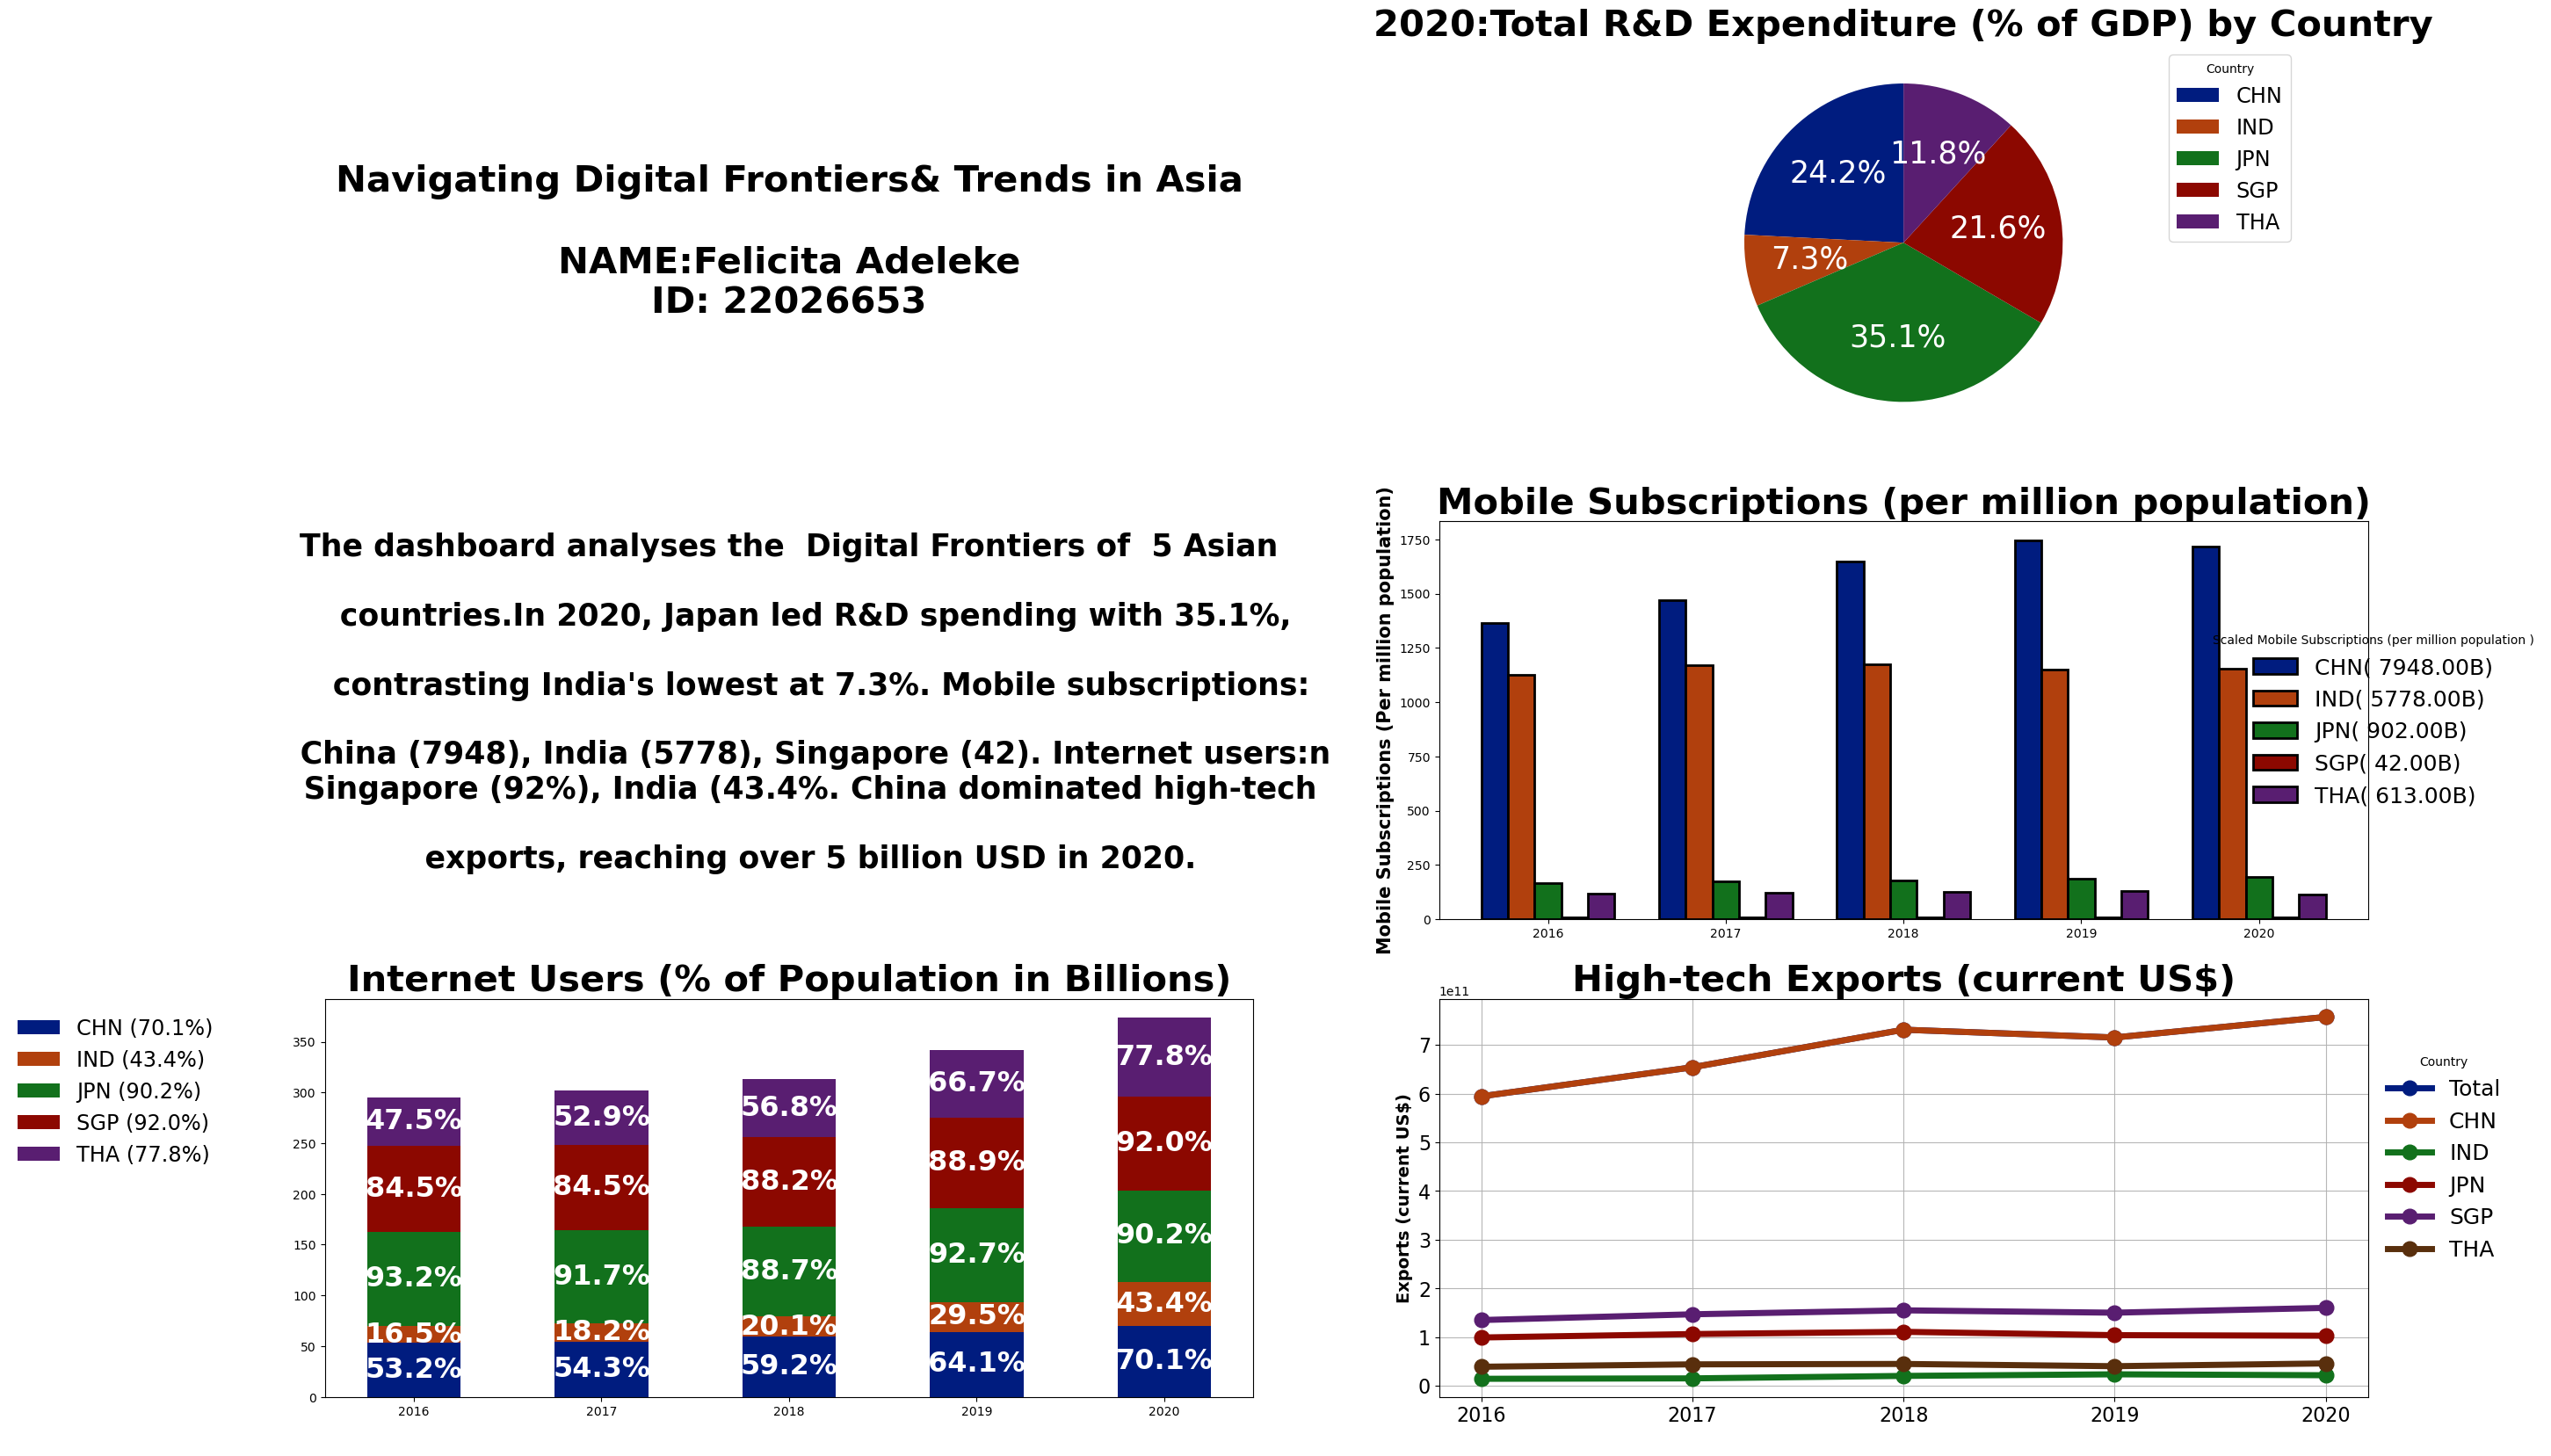

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 10 19:05:29 2024

@author: -
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('./WBDATA.csv')

# Drop rows with NaN
data = data.drop(data.index[20:25])

# Select columns
selected_columns = ["Country Code", "Series Name", "2016 [YR2016]",
                    "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]",
                    "2020 [YR2020]"]

data_clean = data[selected_columns]

# Convert the year columns to numeric
# data_clean.iloc[:, 2:] = data_clean.iloc[:, 2:].apply(
#   pd.to_numeric, errors='coerce')

# Rename the year columns
data_clean = data_clean.rename(columns={
    "2016 [YR2016]": "2016",
    "2017 [YR2017]": "2017",
    "2018 [YR2018]": "2018",
    "2019 [YR2019]": "2019",
    "2020 [YR2020]": "2020"
})

# Filter data for each series
internet_users = data_clean[data_clean[
    'Series Name'] == 'Individuals using the Internet (% of population)'
].dropna()

rd_expenditure = data_clean[data_clean[
    'Series Name'] == 'Research and development expenditure (% of GDP)'
].dropna()

high_tech_exports = data_clean[data_clean['Series Name']
                               == 'High-technology exports (current US$)'
                               ].dropna()

mobile_subscriptions = data_clean[data_clean['Series Name']
                                  == 'Mobile cellular subscriptions'].dropna()

# Prepare data for plotting
years = ['2016', '2017', '2018', '2019', '2020']

# Set Seaborn style
# sns.set_style("whitegrid")

# Create subplots with white background
# Create subplots with white background
fig, axs = plt.subplots(3, 2, figsize=(30, 20))


# Dark color palette
dark_palette = sns.color_palette("dark", n_colors=len(
    internet_users['Country Code'].unique()) + 1)

# plot 1 : Pie Chart
total_expenditure = []
# Data for the pie chart
labels = rd_expenditure["Country Code"].unique()
for idx, country in enumerate(labels):
    country_data = rd_expenditure[rd_expenditure["Country Code"] == country]
    total_expenditure.append(country_data[years].iloc[0].sum())

# Plotting the pie chart in subplot axs[2, 1]
axs[0, 1].pie(total_expenditure, labels=labels, autopct='%1.1f%%',
              colors=dark_palette, startangle=90, textprops={'fontsize': 25,
                                                             'color': 'white'})
axs[0, 1].set_title("2020:Total R&D Expenditure (% of GDP) by Country",
                    fontsize=30, fontweight='1000')

# Add a legend outside the pie chart
axs[0, 1].legend(title='Country', loc='upper right', bbox_to_anchor=(1.5, 1),
                 fontsize='xx-large')

# Scaling factor to reduce the values
scaling_factor = 1e6
# Plot 4: Grouped Bar Chart - Mobile cellular subscriptions
mobile_subs_pivot = mobile_subscriptions[years].T
mobile_subs_pivot.columns = mobile_subscriptions['Country Code'].unique()


# Calculate mobile subscription in billions and round to a whole number
mobile_subs_million = (mobile_subs_pivot / scaling_factor).round(0)

bar_width = 0.15
index = np.arange(len(years))

for i, country in enumerate(mobile_subs_pivot.columns):
    bars = axs[1, 1].bar(
        index+i*bar_width, mobile_subs_million[country], bar_width,
        label=f'{country}({mobile_subs_million[country].sum(): .2f}B)',
        color=dark_palette[i], edgecolor='black', linewidth=2)

# Show grid lines
axs[1, 1].grid(False)

# Legend in the graph with font size 20
axs[1, 1].legend(title='Scaled Mobile Subscriptions (per million population )',
                 bbox_to_anchor=(1.2, 0.5), loc='right', fontsize=18,
                 frameon=False)

axs[1, 1].set_title('Mobile Subscriptions (per million population)',
                    fontsize=30, fontweight='1000', color='black')

# Set explicit tick positions and labels for better alignment
axs[1, 1].set_xticks(index +
                     bar_width * (len(mobile_subs_pivot.columns) - 1) / 2)
axs[1, 1].set_xticklabels(years)
axs[1, 1].set_ylabel('Mobile Subscriptions (Per million population)',
                     color='black', fontsize=15, fontweight='bold')

text_content = """Navigating Digital Frontiers& Trends in Asia\n
NAME:Felicita Adeleke
ID: 22026653"""


axs[0, 0].tick_params(axis='both', which='both', length=0, color='black')
axs[0, 0].text(0.5, 0.5, text_content, ha='center', va='center', fontsize=30,
               weight=1000, color='black')
axs[0, 0].set_frame_on(False)
axs[0, 0].axis('off')

text_content1 = """The dashboard analyses the  Digital Frontiers of  5 Asian\n
      countries.In 2020, Japan led R&D spending with 35.1%, \n
      contrasting India's lowest at 7.3%. Mobile subscriptions:\n
     China (7948), India (5778), Singapore (42). Internet users:n
     Singapore (92%), India (43.4%. China dominated high-tech \n
    exports, reaching over 5 billion USD in 2020.\n"""

axs[1, 0].tick_params(axis='both', which='both', length=0, color='black')
axs[1, 0].text(0.5, 0.5, text_content1, ha='center', va='center', fontsize=25,
               weight=1000, color='black')
axs[1, 0].set_frame_on(False)
axs[1, 0].axis('off')

# Plot 3: Line Plot - High-technology exports (current US$)
axs[2, 1].plot(years, high_tech_exports[years].iloc[0], marker='o',
               linestyle='-', linewidth=5,
               markersize=12, color=dark_palette[0], label='Total')

for idx, country in enumerate(high_tech_exports['Country Code'].unique()):
    country_data = high_tech_exports[
        high_tech_exports['Country Code'] == country]
    axs[2, 1].plot(years, country_data[years].iloc[0], marker='o',
                   linestyle='-', linewidth=5, markersize=12,
                   label=country, color=dark_palette[idx + 1])

axs[2, 1].set_title('High-tech Exports (current US$)',
                    fontsize=30, fontweight='1000', color='black')

axs[2, 1].set_xlabel('Year', fontsize=14, fontweight='bold',
                     color='white')

axs[2, 1].set_ylabel('Exports (current US$)', fontsize=14, fontweight='bold',
                     color='black')

# Increase font size of y and x labels
axs[2, 1].tick_params(axis='both', labelsize=16)

# Show grid lines
axs[2, 1].grid(True, linestyle='-', alpha=0.9)

axs[2, 1].legend(title='Country', loc='center left',
                 bbox_to_anchor=(1.0, 0.6), frameon=False, fontsize=18)

# Scaling factor to reduce the values
scaling_factor = 1e9

# Dark color palette
dark_palette = sns.color_palette("dark",
                                 n_colors=len(internet_users[
                                     'Country Code'].unique()))

# Specify bar width for the stacked bar chart
bar_width_internet_users = 0.7  # Adjust the bar width as needed

# Stacked Bar Chart for Internet Users (% of Population)
bottom_values = np.zeros(len(years))

# Dark color palette
dark_palette = sns.color_palette("dark",
                                 n_colors=len(internet_users[
                                     'Country Code'].unique()))

# Scale the values in billions
internet_users_scaled = internet_users.copy()
# Specify bar width for the stacked bar chart
bar_width_internet_users = 0.5

# Stacked Bar Chart for Internet Users (% of Population) in Billions
bottom_values = np.zeros(len(years))

for idx, country in enumerate(internet_users_scaled['Country Code'].unique()):
    country_data = internet_users_scaled[
        internet_users_scaled['Country Code'] == country]

    axs[2, 0].bar(years, country_data[years].iloc[0],
                  label=f'{country} ({country_data.iloc[0, -1]:.1f}%)',
                  color=dark_palette[idx], bottom=bottom_values,
                  width=bar_width_internet_users)

    # Add percentages inside the stacked bars
    for i, year in enumerate(years):
        percentage_value = country_data[year].iloc[0]
        axs[2, 0].text(year, bottom_values[i] + percentage_value / 2,
                       f'{percentage_value:.1f}%', ha='center',
                       va='center', color='white', fontsize=23,
                       fontweight='1000')

 # Update bottom values for the next country
    bottom_values += country_data[years].iloc[0]

axs[2, 0].set_title('Internet Users (% of Population in Billions)',
                    fontsize=30, fontweight=1000, color='black')

axs[2, 0].legend(loc='upper right', fontsize='xx-large',
                 bbox_to_anchor=(-0.1, 1), frameon=False)

plt.show()
